In [2]:
:dep plotly = { version = ">=0.6.0" }
:dep rustfft = { version = ">=5.0.1" }
:dep itertools-num = "0.1.3"

In [3]:
extern crate plotly;
extern crate rand_distr;
extern crate itertools_num;
extern crate itertools;
extern crate rustfft;

In [4]:
use itertools_num::linspace;
use plotly::common::{
    ColorScale, ColorScalePalette, DashType, Fill, Font, Line, LineShape, Marker, Mode, Title,
};
use plotly::layout::{Axis, BarMode, Layout, Legend, TicksDirection};
use plotly::{Bar, NamedColor, Plot, Rgb, Rgba, Scatter};
use rand_distr::{Distribution, Normal, Uniform};

In [5]:
fn signal() -> (Vec<f64>, Vec<f64>) {
    let n: usize = 1024;
    let t: Vec<f64> = linspace(0., 10., n).collect();
    let y1: Vec<f64> = t.iter().map(|x| x.sin()).collect();
    let y2: Vec<f64> = t.iter().map(|x| x.mul_add(4.5, 3.0).sin()).collect();
    let y3: Vec<f64> = t.iter().map(|x| x.mul_add(24.5, 3.0).sin()).collect();

    let y4: Vec<f64> = y1.iter().zip(y2.iter()).map(|(a,b)| a+b).collect();
    let y: Vec<f64> = y3.iter().zip(y4.iter()).map(|(a,b)| a+b).collect();
    return (t, y);
}

fn simple_scatter_plot(x: Vec<f64>, y: Vec<f64>) {
    let trace = Scatter::new(x, y).mode(Mode::Markers);
    let mut plot = Plot::new();
    plot.add_trace(trace);
    let layout = Layout::new().height(800);
    plot.set_layout(layout);
    plot.lab_display();
}


fn simple_bar_plot(x: Vec<f64>, y: Vec<f64>) {
    let trace = Bar::new(x, y);
    let mut plot = Plot::new();
    plot.add_trace(trace);
    let layout = Layout::new().height(800);
    plot.set_layout(layout);
    plot.lab_display();
}

In [6]:
let (x, y) = signal();

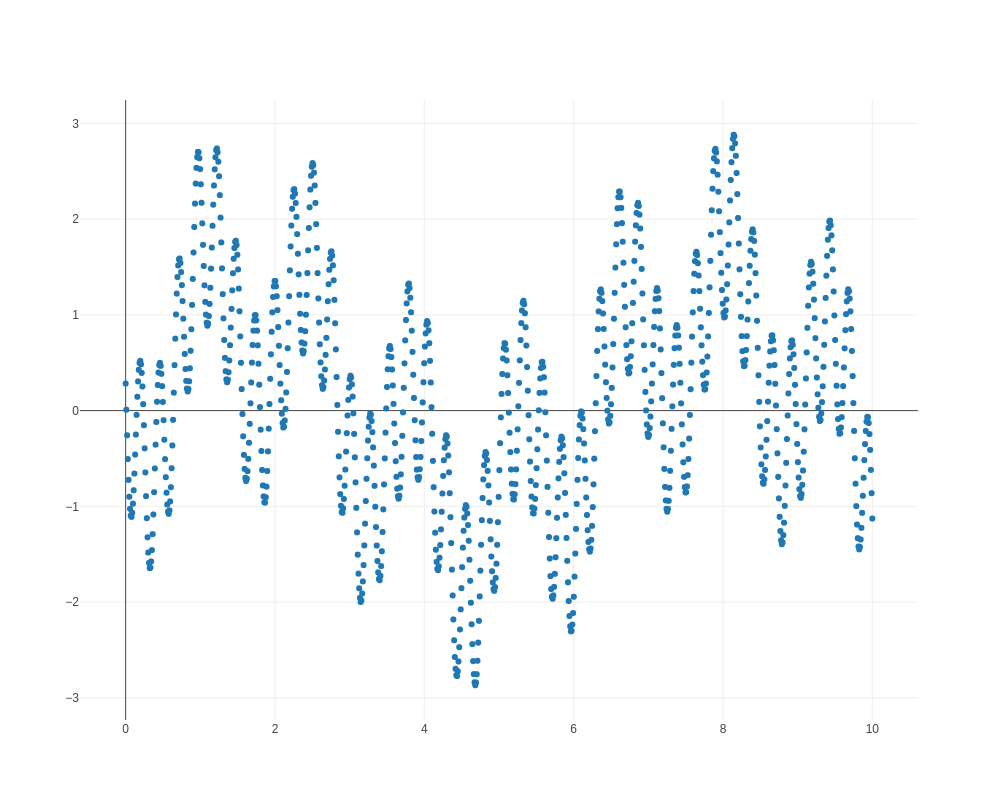

In [7]:
simple_scatter_plot(x, y);

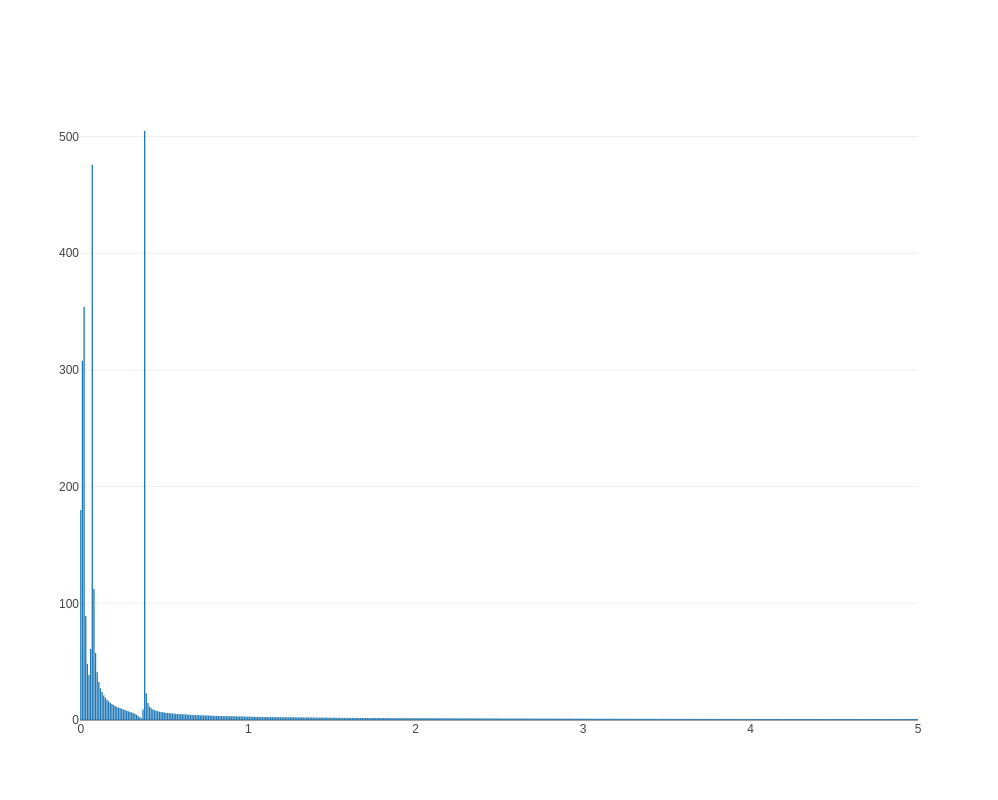

In [8]:
use rustfft::{FftPlanner, num_complex::Complex};

fn fft(y: Vec<f64>) -> Vec<Complex<f64>> {
    let mut planner = FftPlanner::new();
    let fft = planner.plan_fft_forward(1024);
    let mut b: Vec<Complex<f64>> = y.iter().map(|y| Complex{re: y+0.0, im: 0.0}).collect();
    fft.process(&mut b);
    return b;
}

let (x, y) = signal();
let ffty: Vec<f64> = fft(y).iter().map(|val| val.norm()).collect();
simple_bar_plot(x[0..512].to_vec(), ffty[0..512].to_vec());